# Canny Filters on Example Images

Weekly Update: Include a sample image and feature visualization for each classification category


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
!ls

Data                    Untitled.ipynb          setup_notebook.sh
LICENSE                 chest-ctscan-images.zip venv
README.md               requirements.txt


img_n.shape is  (481, 617, 4)
img_a.shape is  (221, 368, 4)
img_l.shape is  (213, 423, 4)
img_l.shape is  (213, 423, 4)


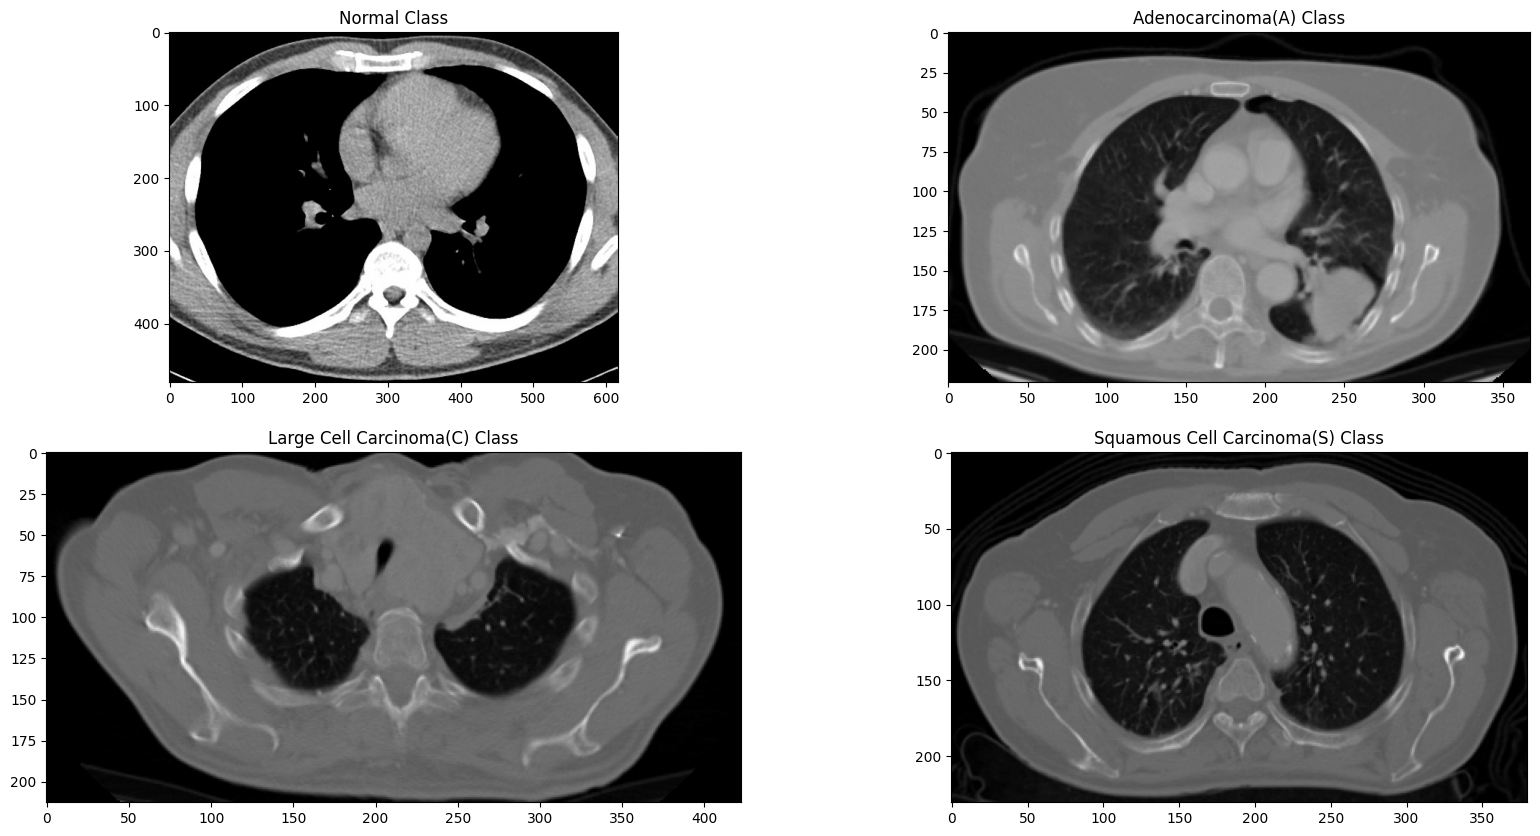

In [4]:
n_path = 'Data/train/normal/4.png'
a_path = 'Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000061.png'
l_path = 'Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000002.png'
s_path = 'Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000003.png'

img_n = plt.imread(n_path)
print('img_n.shape is ',img_n.shape)
img_a = plt.imread(a_path)
print('img_a.shape is ',img_a.shape)
img_l = plt.imread(l_path)
print('img_l.shape is ',img_l.shape)
img_s = plt.imread(s_path)
print('img_l.shape is ',img_l.shape)

# visualize the points
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax[0,0].imshow(img_n,cmap='gray', vmin=0, vmax=255)
ax[0,0].title.set_text('Normal Class')
ax[0,1].imshow(img_a, cmap='gray', vmin=0, vmax=255)
ax[0,1].title.set_text('Adenocarcinoma(A) Class')
ax[1,0].imshow(img_l, cmap='gray', vmin=0, vmax=255)
ax[1,0].title.set_text('Large Cell Carcinoma(C) Class')
ax[1,1].imshow(img_s, cmap='gray', vmin=0, vmax=255)
ax[1,1].title.set_text('Squamous Cell Carcinoma(S) Class')


plt.show()

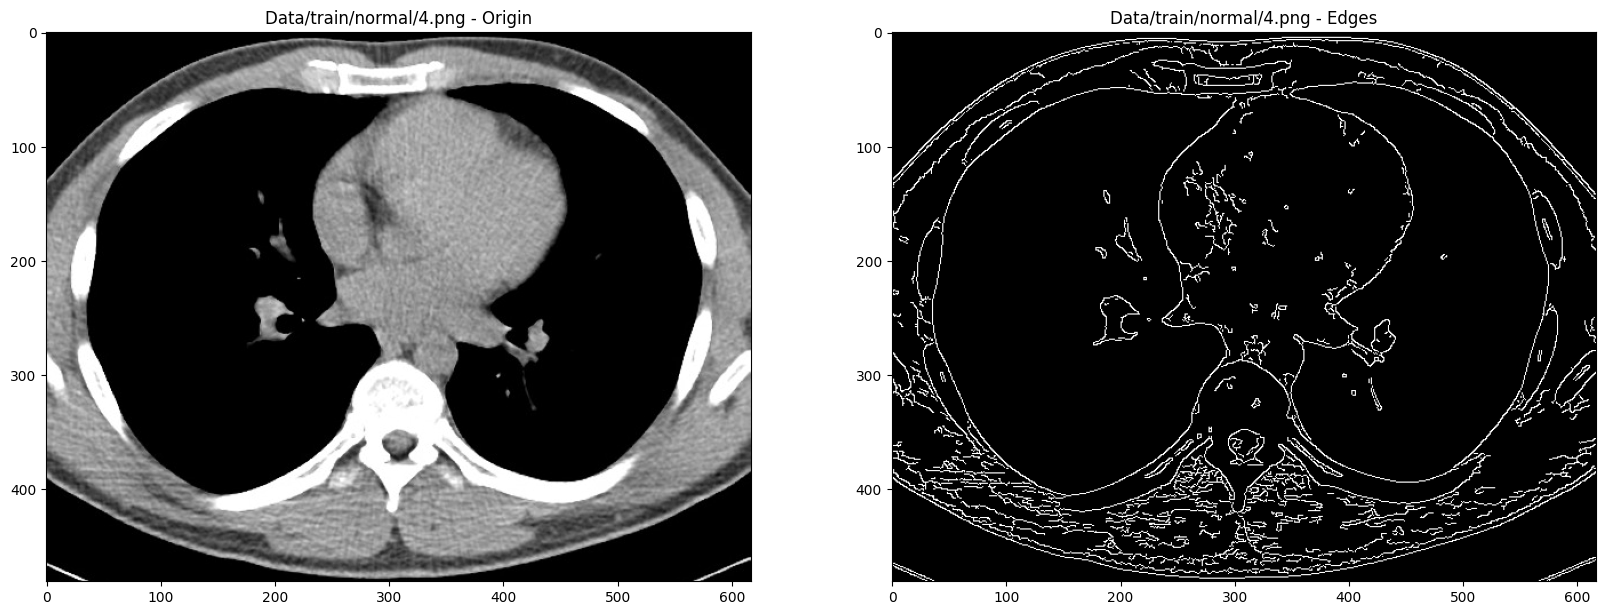

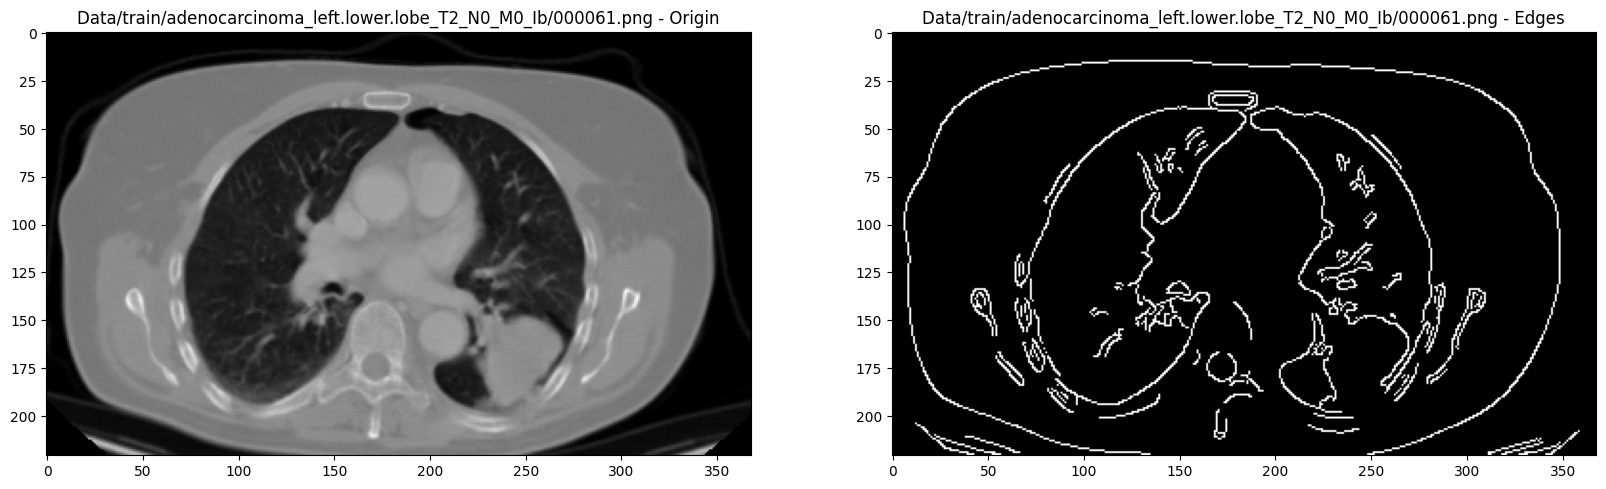

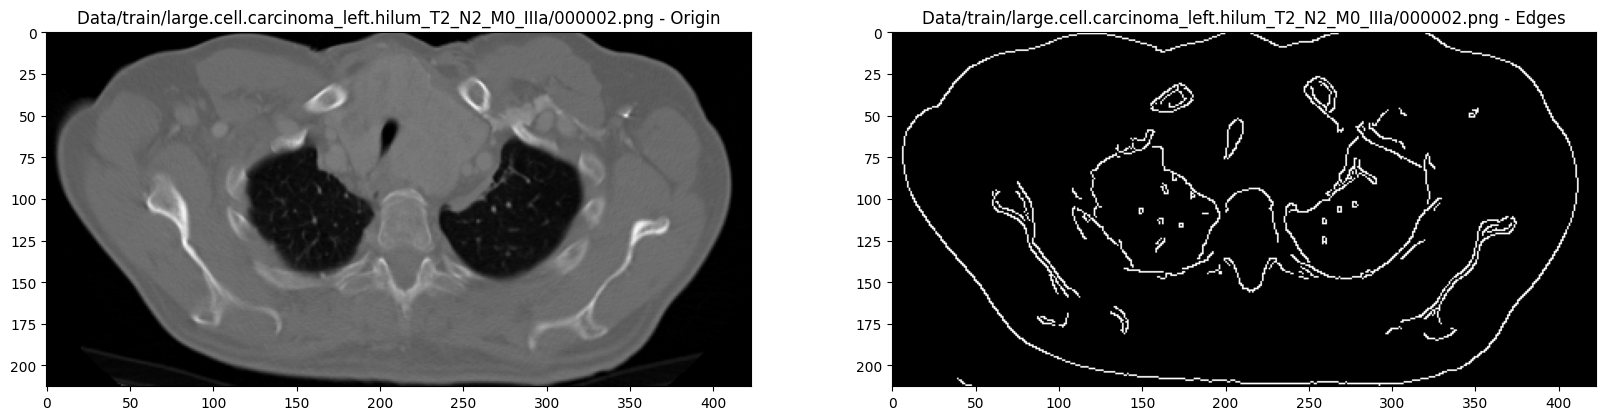

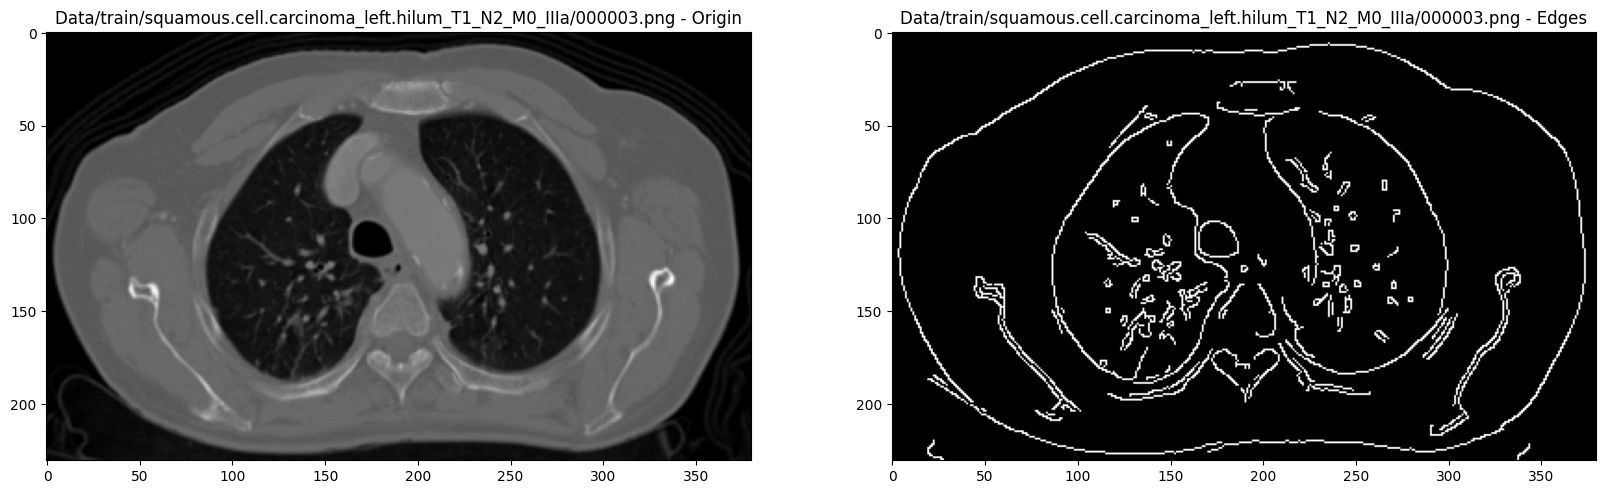

In [9]:
def apply_canny(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Canny edge detection
    edges = cv2.Canny(image, 100, 200)  # Adjust the threshold values as per your requirements

    # Display the original and processed images
#     cv2.imshow("Original", image)
#     cv2.imshow("Edges", edges)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
    ax[0].imshow(image,cmap='gray', vmin=0, vmax=255)
    # ax[0].title.set_text('Origin')
    ax[0].title.set_text(image_path + ' - Origin')
    ax[1].imshow(edges, cmap='gray', vmin=0, vmax=255)
    ax[1].title.set_text(image_path + ' - Edges')
    
    
# Replace the image paths with the actual paths to your images
image_a_path = "path_to_image_a.jpg"
image_b_path = "path_to_image_b.jpg"
image_c_path = "path_to_image_c.jpg"
image_d_path = "path_to_image_d.jpg"

# Apply Canny filter to each image

apply_canny(n_path)
apply_canny(a_path)
apply_canny(l_path)
apply_canny(s_path)




